In [4]:
import torch_optimizer as optim
from networks import CatNet
import torch

model = CatNet(num_classes=5)

optimizer = optim.Ranger(
    model.parameters(),
    lr=1e-3,
    alpha=0.5,
    k=6,
    N_sma_threshhold=5,
    betas=(.95, 0.999),
    eps=1e-5,
    weight_decay=0
)

checkpoint = torch.load("checkpoint_best")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

model.eval()
model.cuda()

CatNet(
  (block1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): mish_layer()
  )
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (block2): skip_connection_block(
    (conv_il): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (batn_il): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_ol): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (batn_ol): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_sl): Conv2d(64, 64, kernel_size=(1, 1), stride=(2, 2))
    (batn_sl): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (block3): skip_connection_block(
    (conv_il): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (batn_il): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tr

In [6]:
import glob
files = glob.glob("benchmark/*.nii.gz")

In [29]:
from torchio import Subject, Image, INTENSITY
subjects = []


def get_subject_id(path):
    return path.split('\\')[1].split('.')[0]

for file in files:
    subject_id = get_subject_id(file)
    images_dict = dict(subject_id=subject_id)
    images_dict["benchmark"] = Image(file, INTENSITY)
    subjects.append(Subject(**images_dict))

In [30]:
subjects

[Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); images: 1),
 Subject(Keys: ('subject_id', 'benchmark'); imag

In [71]:
import torchio
tx = torchio.ImagesDataset(subjects)

In [94]:
import numpy as np
images = []

labels = np.zeros((len(files), 5))

for index, subjects_batch in enumerate(tx):
    inputs = subjects_batch['benchmark'][torchio.DATA]
    images.append(inputs)
    sample = inputs.cuda()
    prediction = model(sample)
    p = prediction.argmax().tolist()
    labels[index, p] = 1

In [96]:
import pandas as pd

pl = pd.DataFrame(labels)

In [101]:
pl.to_csv("./predictions")

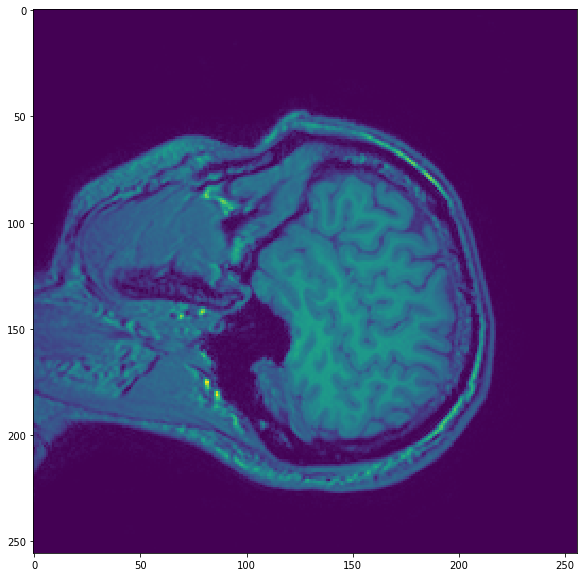

In [108]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(images[48][0,0,:,:])
plt.show()

In [76]:
inputs.shape

torch.Size([1, 1, 256, 256])

In [67]:
d = subjects[0].get_images("benchmark")

KeyError: 'type'

In [65]:
d["benchmark"]

TypeError: 'method' object is not subscriptable

In [46]:
from tqdm.auto import tqdm

with torch.no_grad():
    for data, _ in tqdm(bench_data, total = 1000):
        print(data)
        sample = data.cuda()

        prediction = model(sample)
        all_predictions.append(prediction.cpu())

        all_labels.append(label)

subject_id



AttributeError: 'str' object has no attribute 'cuda'